# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

N = 200

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

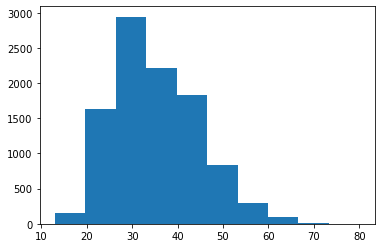

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[19.99489741 45.55108607 31.58409777 37.50567225 42.54287406 45.37782746
 50.3976072  33.36218004 31.18375419 52.46356236 49.02614907 45.02626308
 40.86878511 40.68541479 27.10791455 49.3089577  23.88133477 47.65780119
 35.00770387 29.49142507 26.05822703 31.89023249 37.22795481 29.75680086
 44.06120197 36.91013825 40.91322354 36.62610302 36.3838982  30.69164196
 49.49357904 35.23514762 38.33975497 31.29164367 23.28535339 46.32223884
 40.29538343 27.53753671 33.33893852 33.26881283 27.81847177 35.40245735
 29.52362368 34.37738561 19.1557452  50.53521812 56.17530614 32.82037401
 45.15603835 30.38544313 32.24960365 49.13922959 36.21122669 36.02041462
 51.86225693 36.7458867  48.87347728 52.86617699 43.47300921 22.37101368
  8.59526921 29.90008201 32.32600777 39.64051426 52.17274215 24.06659082
 34.9280159  24.28554355 26.90092287 23.15759158 26.79388825 57.07110184
 35.32061202 33.53717887 46.76076563 22.56213266 45.82076268 33.24085301
 40.50087941 23.66626948 32.80961353 25.87054073 36

(array([ 4.,  5., 13., 32., 29., 39., 31., 24., 17.,  6.]),
 array([ 8.59526921, 13.44285247, 18.29043574, 23.138019  , 27.98560226,
        32.83318552, 37.68076879, 42.52835205, 47.37593531, 52.22351857,
        57.07110184]),
 <BarContainer object of 10 artists>)

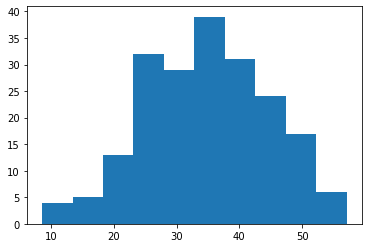

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,2), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.34 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [8]:
noOxPotential = df[(df['Age'] >= 18) & (df['Age'] <= 55)].Age.count() 
noOxPotential

9699

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above.

In [9]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.02196102690999072

In [10]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0

Calculate use of oxygen synthetic data

In [11]:
oxUse = []
for a in vals:
    if a >= 18 and a <= 55:
        oxUse.append(synNoOx)
    else:
        oxUse.append(1)
print(oxUse)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


Calculate the probabilities of climbing in each season.

In [12]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset.

In [13]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr'

Calculate the probabilities of surviving for summitting in each season with and without oxygen.

In [14]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


Compile list with climber number, ages, season and oxygen use.

In [15]:
synEverestData = []

def everestFunction():
    for i in range(0, N):
        data = []
        if oxUse[i] == 0 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())

        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        if death == 0:
            death2 = 'Survived'
        else:
            death2 = 'Died'


        data = [i, round(vals[i],0), oxUse2, seasList[i], death2]
        synEverestData.append(data)
        synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])
        
    return synEverestDataDf
        

everestFunction()



,Climber,Age,Oxygen,Season,Survived
0,0,20.0,Yes,Spr,Survived
1,1,46.0,Yes,Spr,Survived
2,2,32.0,Yes,Spr,Survived
3,3,38.0,Yes,Spr,Died
4,4,43.0,Yes,Spr,Survived
...,...,...,...,...,...
195,195,47.0,Yes,Spr,Survived
196,196,42.0,Yes,Spr,Survived
197,197,12.0,No,Spr,Survived
198,198,23.0,Yes,Spr,Survived


In [16]:
synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])

synEverestDataDf.head()

,Climber,Age,Oxygen,Season,Survived
0,0,20.0,Yes,Spr,Survived
1,1,46.0,Yes,Spr,Survived
2,2,32.0,Yes,Spr,Survived
3,3,38.0,Yes,Spr,Died
4,4,43.0,Yes,Spr,Survived


In [17]:
numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
numberOfDeaths

7

In [18]:
historicalDeathRate = round(df[(df['Dth'] == 'Y')].Dth.count() / df.Dth.count(),3)
print(historicalDeathRate)

0.008


In [19]:
predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
print(predictDeathRate)

0.035
